In [1]:
from rdkit import rdBase
rdBase.rdkitVersion

'2019.03.2'

In [2]:
import glob
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

import pandas as pd
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path_to_library = '../FragmentLibrary'

# list of folders for each subpocket
folders = glob.glob(path_to_library+'/*')
subpockets = [folder[-2:] for folder in folders]
subpockets

['FP', 'B2', 'AP', 'SE', 'B1', 'GA']

In [4]:
# read data

data = pd.DataFrame()

rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

# iterate over subpockets
for i, folder in enumerate(folders):
    
    subpocket = subpockets[i]
    
    file = folder+'/'+subpocket+'.sdf' 
    df = PandasTools.LoadSDF(file, embedProps=False)
        
    fragments = []
    fingerprints = []
    smiles = []

    for frag in df.ROMol:
        # remove dummy atoms from fragments and create smiles
        du = Chem.MolFromSmiles('*')
        h = Chem.MolFromSmiles('[H]', sanitize=False)
        fixed_frag = AllChem.ReplaceSubstructs(frag, du, h, replaceAll=True)[0]
        fixed_frag = Chem.RemoveHs(fixed_frag)
        # 2D coordinates
        tmp = AllChem.Compute2DCoords(fixed_frag)
        fragments.append(fixed_frag)
        # smiles for drawing fragment
        smiles.append(Chem.MolToSmiles(fixed_frag))
        # fingerprint of fragment
        fingerprints.append(rdkit_gen.GetFingerprint(fixed_frag))
     
    df['smiles'] = smiles
    df['fragment'] = fragments
    df['fingerprint'] = fingerprints
    df['subpocket'] = subpocket
    
    data = data.append(df)
    
data = data.reset_index(drop=True)
data.shape

RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:49] Unexpected error hit on line 56
RDKit ERROR: [14:57:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:49] Unexpected error hit on line 119
RDKit ERROR: [14:57:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /o

RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:49] Unexpected error hit on line 17449
RDKit ERROR: [14:57:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:49] Unexpected error hit on line 17522
RDKit ERROR: [14:57:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:49] Unexpected error hit on line 33831
RDKit ERROR: [14:57:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:49] Unexpected error hit on line 33886
RDKit ERROR: [14:57:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file

RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:49] Unexpected error hit on line 51455
RDKit ERROR: [14:57:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:49] Unexpected error hit on line 51529
RDKit ERROR: [14:57:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:50] Unexpected error hit on line 68406
RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:50] Unexpected error hit on line 68476
RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range

RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:50] Unexpected error hit on line 85909
RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:50] Unexpected error hit on line 85968
RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:50] Unexpected error hit on line 103382
RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:50] Unexpected error hit on line 103443
RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:50] Unexpected error hit on line 120094
RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:50] Unexpected error hit on line 120163
RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [14:57:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:52] Unexpected error hit on line 47
RDKit ERROR: [14:57:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:52] Unexpected error hit on line 102
RDKit ERROR: [14:57:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Erro

RDKit ERROR: [14:57:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:52] Unexpected error hit on line 65
RDKit ERROR: [14:57:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:52] Unexpected error hit on line 129
RDKit ERROR: [14:57:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range 

RDKit ERROR: [14:57:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:52] Unexpected error hit on line 15906
RDKit ERROR: [14:57:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:52] Unexpected error hit on line 15969
RDKit ERROR: [14:57:52] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:53] Unexpected error hit on line 32407
RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:53] Unexpected error hit on line 32470
RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 23 < 23
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:53] Unexpected error hit on line 45975
RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:53] Unexpected error hit on line 46064
RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:53] Unexpected error hit on line 60647
RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 21 < 21
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:53] Unexpected error hit on line 60741
RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:53] Unexpected error hit on line 74817
RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:53] Unexpected error hit on line 74885
RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:53] Unexpected error hit on line 87786
RDKit ERROR: [14:57:53] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:54] Unexpected error hit on line 87870
RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:54] Unexpected error hit on line 101629
RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:54] Unexpected error hit on line 101710
RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:54] Unexpected error hit on line 117177
RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:54] Unexpected error hit on line 117253
RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:54] Unexpected error hit on line 133678
RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:54] Unexpected error hit on line 133755
RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:54] Unexpected error hit on line 150214
RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:54] Unexpected error hit on line 150269
RDKit ERROR: [14:57:54] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [14:57:55] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:55] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:55] Unexpected error hit on line 166366
RDKit ERROR: [14:57:55] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:55] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:55] Unexpected error hit on line 166447
RDKit ERROR: [14:57:55] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:55] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR:

RDKit ERROR: [14:57:55] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:55] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:55] Unexpected error hit on line 182811
RDKit ERROR: [14:57:55] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:55] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:55] Unexpected error hit on line 182864
RDKit ERROR: [14:57:55] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:55] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:57:55] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:58] Unexpected error hit on line 56
RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:58] Unexpected error hit on line 169
RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Er

RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:58] Unexpected error hit on line 15138
RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:58] Unexpected error hit on line 15209
RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:58] Unexpected error hit on line 27090
RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:58] Unexpected error hit on line 27150
RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 24 < 24
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:58] Unexpected error hit on line 41112
RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:58] Unexpected error hit on line 41180
RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:58] Unexpected error hit on line 58177
RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:58] Unexpected error hit on line 58244
RDKit ERROR: [14:57:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Ran

RDKit ERROR: [14:57:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:59] Unexpected error hit on line 75916
RDKit ERROR: [14:57:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:59] Unexpected error hit on line 75971
RDKit ERROR: [14:57:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range

RDKit ERROR: [14:57:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:59] Unexpected error hit on line 93913
RDKit ERROR: [14:57:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:57:59] Unexpected error hit on line 93981
RDKit ERROR: [14:57:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:57:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: R

RDKit ERROR: [14:57:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:00] Unexpected error hit on line 54
RDKit ERROR: [14:58:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:00] Unexpected error hit on line 121
RDKit ERROR: [14:58:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Erro

RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:01] Unexpected error hit on line 913
RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:01] Unexpected error hit on line 996
RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range E

RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:01] Unexpected error hit on line 16741
RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:01] Unexpected error hit on line 16786
RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in fi

RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:01] Unexpected error hit on line 33410
RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:01] Unexpected error hit on line 33481
RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:01] Unexpected error hit on line 49556
RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:01] Unexpected error hit on line 49642
RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in 

RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:01] Unexpected error hit on line 65013
RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /opt/conda/conda-bld/rdkit_1558069515250/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:58:01] Unexpected error hit on line 65068
RDKit ERROR: [14:58:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:58:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range

(7475, 14)

In [5]:
df_AP = data[data.subpocket=='AP']
df_FP = data[data.subpocket=='FP']
df_SE = data[data.subpocket=='SE']
df_GA = data[data.subpocket=='GA']
df_B1 = data[data.subpocket=='B1']
df_B2 = data[data.subpocket=='B2']

Functions needed for Clustering:

In [6]:
# Calculate distance matrix for fingerprint list
def Tanimoto_distance_matrix(fp_list):
    fp_list = list(fp_list)
    dissimilarity_matrix = []
    for i in range(1,len(fp_list)):
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i],fp_list[:i])
        # Since we need a distance matrix, calculate 1-x for every element in similarity matrix
        dissimilarity_matrix.extend([1-x for x in similarities])
    return dissimilarity_matrix

In [7]:
# Input: Fingerprints and a threshold for the clustering
def ClusterFps(fps, cutoff=0.2):
    # Calculate Tanimoto distance matrix
    distance_matr = Tanimoto_distance_matrix(fps)
    # Now cluster the data with the implemented Butina algorithm:
    clusters = Butina.ClusterData(distance_matr,len(fps),cutoff,isDistData=True)
    return clusters

In [8]:
def analyze_clusters(clusters, subpocket, cutoff):
    
    # Give a short report about the numbers of clusters and their sizes
    num_clust_g1 = len([c for c in clusters if len(c) == 1])
    num_clust_g5 = len([c for c in clusters if len(c) > 5])
    num_clust_g25 = len([c for c in clusters if len(c) > 25])
    num_clust_g100 = len([c for c in clusters if len(c) > 100])

    print(subpocket)
    print("Threshold: ", cutoff)
    print("total # clusters: ", len(clusters))
    print("# clusters with only 1 compound: ", num_clust_g1)
    print("# clusters with >5 compounds: ", num_clust_g5)
    print("# clusters with >25 compounds: ", num_clust_g25)
    print("# clusters with >100 compounds: ", num_clust_g100)

    # Plot the size of the clusters
    fig = plt.figure(1, figsize=(8, 3))
    plt1 = plt.subplot(111)
    plt.axis([0, len(clusters), 0, len(clusters[0])+1])
    plt.xlabel('Cluster index', fontsize=20)
    plt.ylabel('Number of molecules', fontsize=20)
    plt.tick_params(labelsize=16)
    plt.title('Threshold: '+str('%3.1f' %cutoff), fontsize=10)
    plt1.bar(range(1, len(clusters)), [len(c) for c in clusters[:len(clusters)-1]], lw=0)
    plt.show()

    return


## Butina Clustering for each subpocket with different cutoffs:

AP
Threshold:  0.0
total # clusters:  1200
# clusters with only 1 compound:  819
# clusters with >5 compounds:  78
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


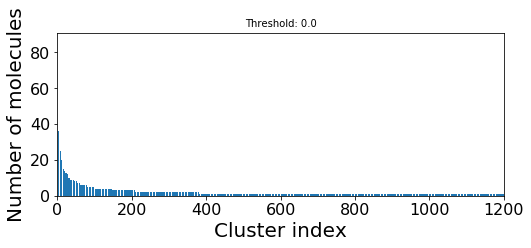

AP
Threshold:  0.1
total # clusters:  1123
# clusters with only 1 compound:  737
# clusters with >5 compounds:  89
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


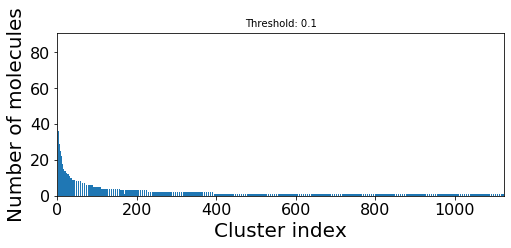

AP
Threshold:  0.2
total # clusters:  920
# clusters with only 1 compound:  562
# clusters with >5 compounds:  99
# clusters with >25 compounds:  8
# clusters with >100 compounds:  0


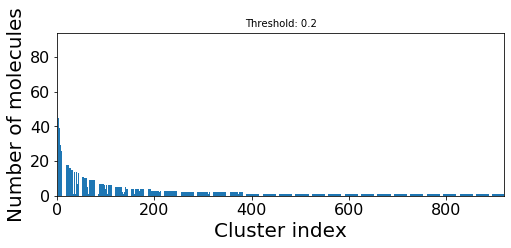

AP
Threshold:  0.30000000000000004
total # clusters:  729
# clusters with only 1 compound:  412
# clusters with >5 compounds:  96
# clusters with >25 compounds:  12
# clusters with >100 compounds:  1


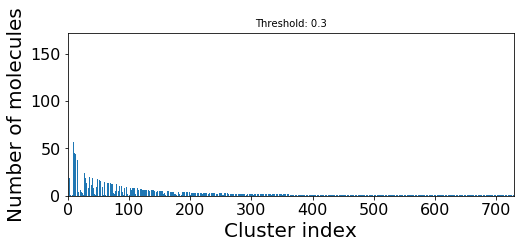

AP
Threshold:  0.4
total # clusters:  562
# clusters with only 1 compound:  297
# clusters with >5 compounds:  96
# clusters with >25 compounds:  18
# clusters with >100 compounds:  1


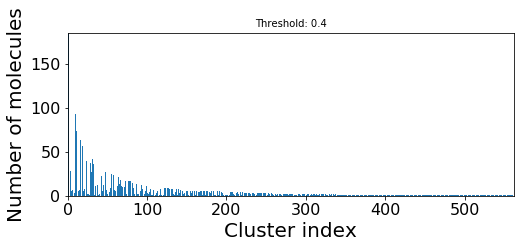

AP
Threshold:  0.5
total # clusters:  392
# clusters with only 1 compound:  182
# clusters with >5 compounds:  85
# clusters with >25 compounds:  18
# clusters with >100 compounds:  4


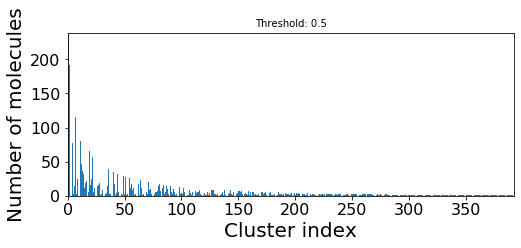

AP
Threshold:  0.6000000000000001
total # clusters:  230
# clusters with only 1 compound:  93
# clusters with >5 compounds:  66
# clusters with >25 compounds:  20
# clusters with >100 compounds:  5


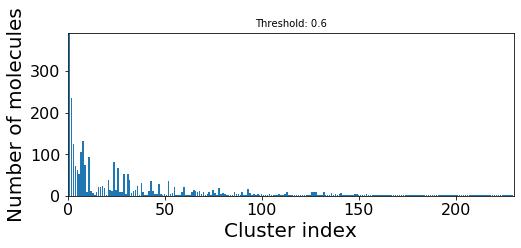

AP
Threshold:  0.7000000000000001
total # clusters:  122
# clusters with only 1 compound:  45
# clusters with >5 compounds:  45
# clusters with >25 compounds:  19
# clusters with >100 compounds:  3


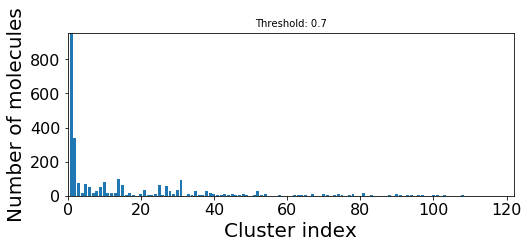

AP
Threshold:  0.8
total # clusters:  44
# clusters with only 1 compound:  12
# clusters with >5 compounds:  16
# clusters with >25 compounds:  8
# clusters with >100 compounds:  4


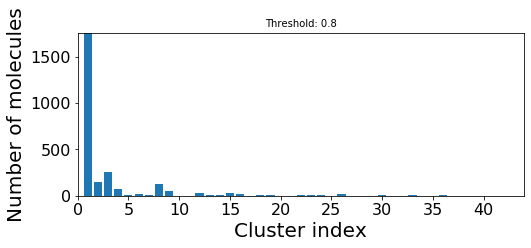

AP
Threshold:  0.9
total # clusters:  11
# clusters with only 1 compound:  2
# clusters with >5 compounds:  6
# clusters with >25 compounds:  2
# clusters with >100 compounds:  1


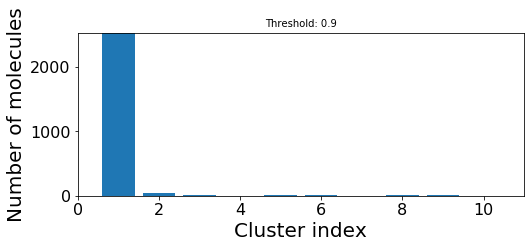

In [9]:
# cluster adenine pocket
fps = df_AP.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'AP', cutoff=i)

FP
Threshold:  0.0
total # clusters:  776
# clusters with only 1 compound:  523
# clusters with >5 compounds:  57
# clusters with >25 compounds:  3
# clusters with >100 compounds:  0


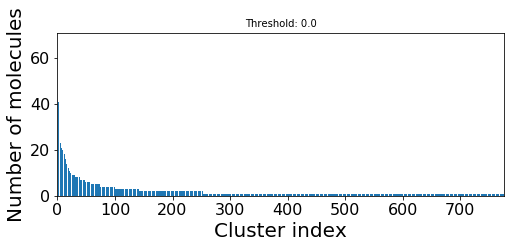

FP
Threshold:  0.1
total # clusters:  749
# clusters with only 1 compound:  491
# clusters with >5 compounds:  58
# clusters with >25 compounds:  3
# clusters with >100 compounds:  0


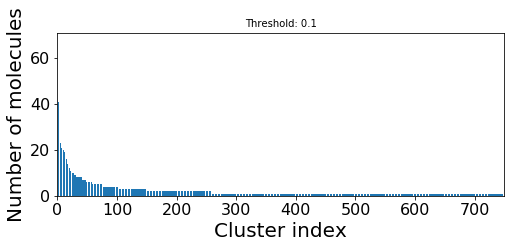

FP
Threshold:  0.2
total # clusters:  682
# clusters with only 1 compound:  419
# clusters with >5 compounds:  65
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


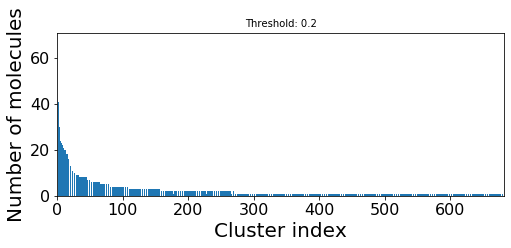

FP
Threshold:  0.30000000000000004
total # clusters:  564
# clusters with only 1 compound:  313
# clusters with >5 compounds:  61
# clusters with >25 compounds:  11
# clusters with >100 compounds:  0


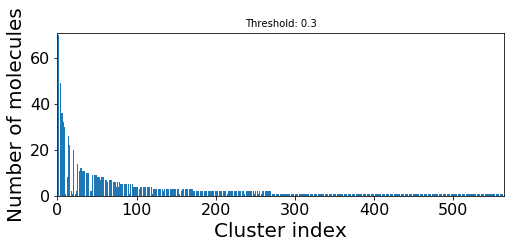

FP
Threshold:  0.4
total # clusters:  440
# clusters with only 1 compound:  216
# clusters with >5 compounds:  67
# clusters with >25 compounds:  11
# clusters with >100 compounds:  0


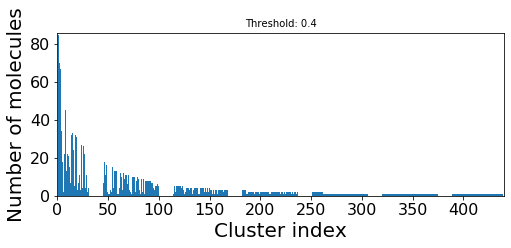

FP
Threshold:  0.5
total # clusters:  305
# clusters with only 1 compound:  136
# clusters with >5 compounds:  62
# clusters with >25 compounds:  13
# clusters with >100 compounds:  2


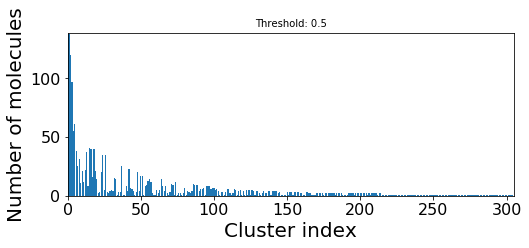

FP
Threshold:  0.6000000000000001
total # clusters:  220
# clusters with only 1 compound:  79
# clusters with >5 compounds:  57
# clusters with >25 compounds:  16
# clusters with >100 compounds:  3


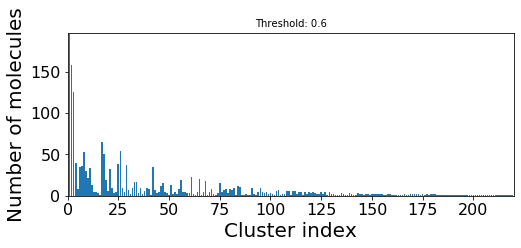

FP
Threshold:  0.7000000000000001
total # clusters:  108
# clusters with only 1 compound:  27
# clusters with >5 compounds:  48
# clusters with >25 compounds:  13
# clusters with >100 compounds:  4


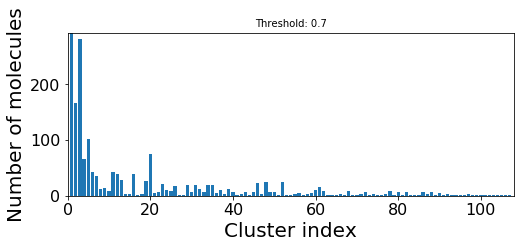

FP
Threshold:  0.8
total # clusters:  50
# clusters with only 1 compound:  9
# clusters with >5 compounds:  25
# clusters with >25 compounds:  8
# clusters with >100 compounds:  5


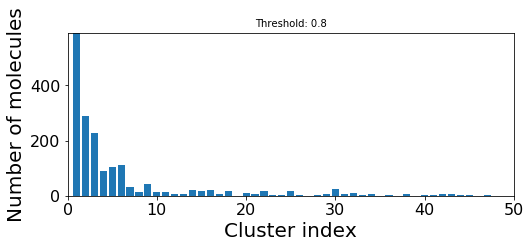

FP
Threshold:  0.9
total # clusters:  14
# clusters with only 1 compound:  3
# clusters with >5 compounds:  8
# clusters with >25 compounds:  4
# clusters with >100 compounds:  2


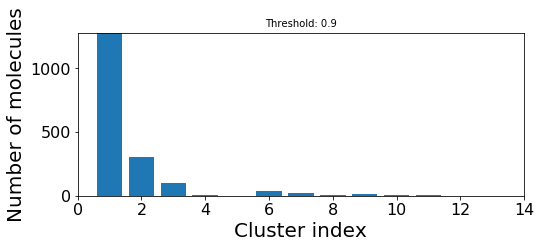

In [10]:
# cluster front pocket
fps = df_FP.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'FP', cutoff=i)

SE
Threshold:  0.0
total # clusters:  608
# clusters with only 1 compound:  406
# clusters with >5 compounds:  46
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


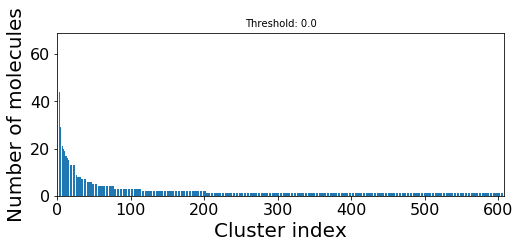

SE
Threshold:  0.1
total # clusters:  576
# clusters with only 1 compound:  376
# clusters with >5 compounds:  46
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


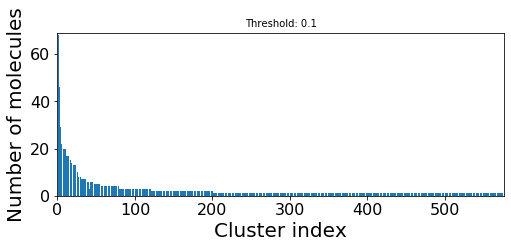

SE
Threshold:  0.2
total # clusters:  492
# clusters with only 1 compound:  302
# clusters with >5 compounds:  51
# clusters with >25 compounds:  5
# clusters with >100 compounds:  0


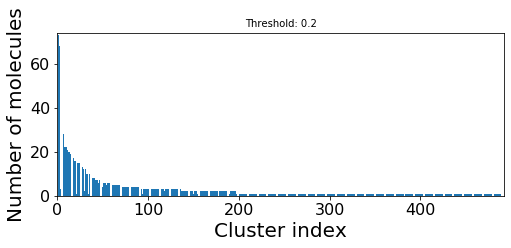

SE
Threshold:  0.30000000000000004
total # clusters:  410
# clusters with only 1 compound:  236
# clusters with >5 compounds:  49
# clusters with >25 compounds:  7
# clusters with >100 compounds:  0


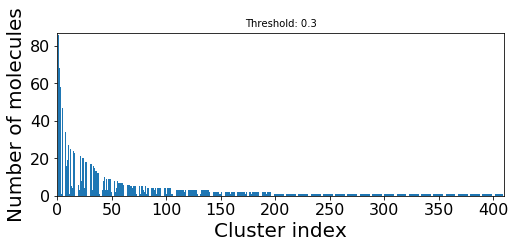

SE
Threshold:  0.4
total # clusters:  307
# clusters with only 1 compound:  157
# clusters with >5 compounds:  50
# clusters with >25 compounds:  13
# clusters with >100 compounds:  1


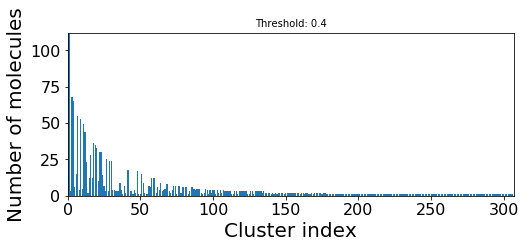

SE
Threshold:  0.5
total # clusters:  213
# clusters with only 1 compound:  90
# clusters with >5 compounds:  43
# clusters with >25 compounds:  14
# clusters with >100 compounds:  2


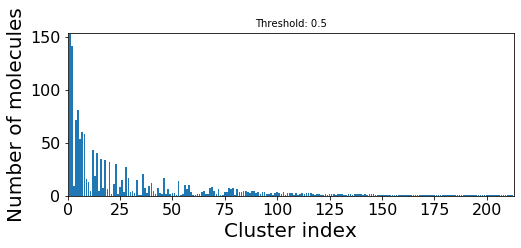

SE
Threshold:  0.6000000000000001
total # clusters:  149
# clusters with only 1 compound:  59
# clusters with >5 compounds:  40
# clusters with >25 compounds:  13
# clusters with >100 compounds:  3


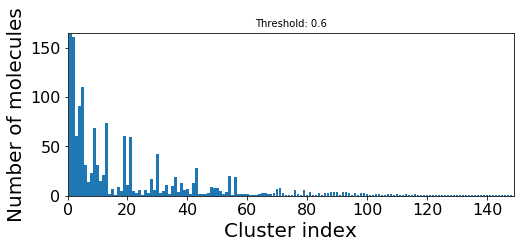

SE
Threshold:  0.7000000000000001
total # clusters:  87
# clusters with only 1 compound:  30
# clusters with >5 compounds:  27
# clusters with >25 compounds:  14
# clusters with >100 compounds:  4


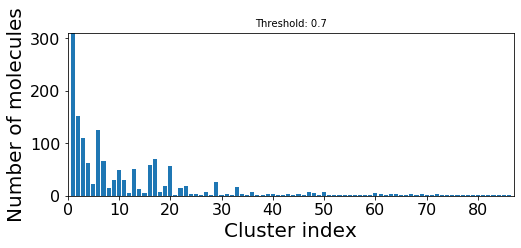

SE
Threshold:  0.8
total # clusters:  39
# clusters with only 1 compound:  7
# clusters with >5 compounds:  18
# clusters with >25 compounds:  10
# clusters with >100 compounds:  4


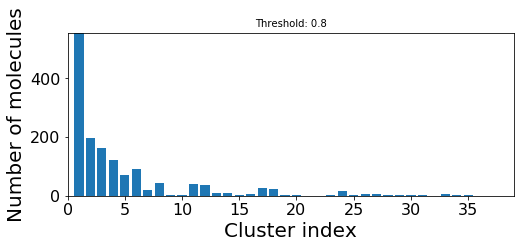

SE
Threshold:  0.9
total # clusters:  14
# clusters with only 1 compound:  3
# clusters with >5 compounds:  6
# clusters with >25 compounds:  6
# clusters with >100 compounds:  1


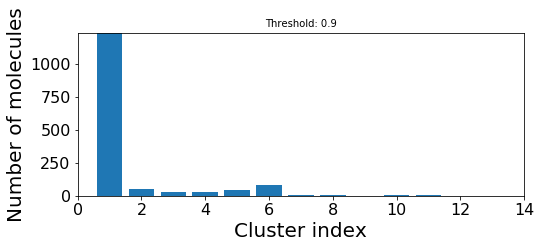

In [11]:
# cluster solvent exposed pocket
fps = df_SE.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'SE', cutoff=i)

GA
Threshold:  0.0
total # clusters:  424
# clusters with only 1 compound:  264
# clusters with >5 compounds:  43
# clusters with >25 compounds:  5
# clusters with >100 compounds:  0


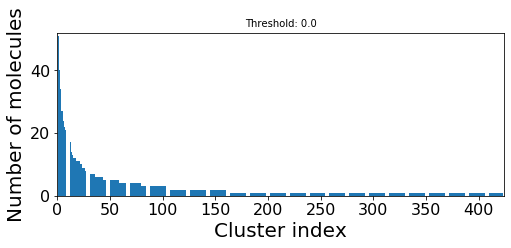

GA
Threshold:  0.1
total # clusters:  414
# clusters with only 1 compound:  250
# clusters with >5 compounds:  44
# clusters with >25 compounds:  5
# clusters with >100 compounds:  0


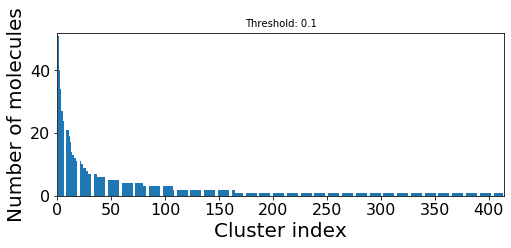

GA
Threshold:  0.2
total # clusters:  359
# clusters with only 1 compound:  205
# clusters with >5 compounds:  49
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


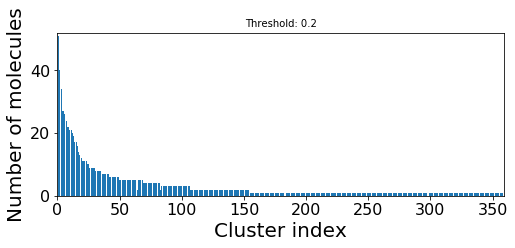

GA
Threshold:  0.30000000000000004
total # clusters:  299
# clusters with only 1 compound:  161
# clusters with >5 compounds:  48
# clusters with >25 compounds:  11
# clusters with >100 compounds:  0


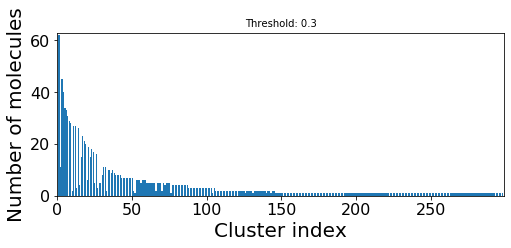

GA
Threshold:  0.4
total # clusters:  243
# clusters with only 1 compound:  120
# clusters with >5 compounds:  50
# clusters with >25 compounds:  9
# clusters with >100 compounds:  1


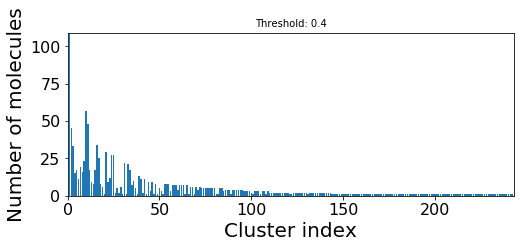

GA
Threshold:  0.5
total # clusters:  180
# clusters with only 1 compound:  85
# clusters with >5 compounds:  36
# clusters with >25 compounds:  12
# clusters with >100 compounds:  1


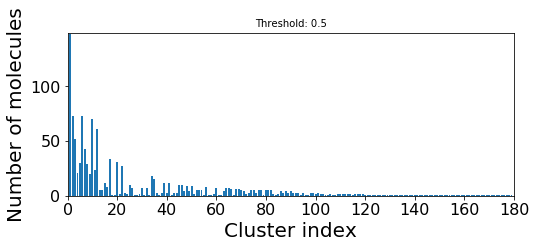

GA
Threshold:  0.6000000000000001
total # clusters:  118
# clusters with only 1 compound:  50
# clusters with >5 compounds:  36
# clusters with >25 compounds:  10
# clusters with >100 compounds:  2


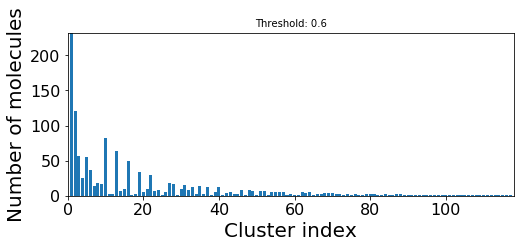

GA
Threshold:  0.7000000000000001
total # clusters:  77
# clusters with only 1 compound:  24
# clusters with >5 compounds:  28
# clusters with >25 compounds:  9
# clusters with >100 compounds:  3


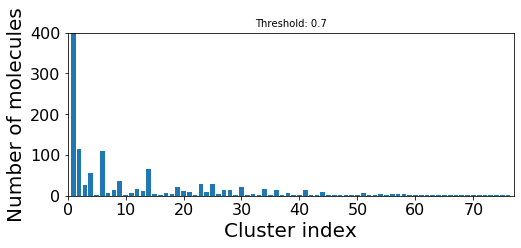

GA
Threshold:  0.8
total # clusters:  35
# clusters with only 1 compound:  5
# clusters with >5 compounds:  21
# clusters with >25 compounds:  8
# clusters with >100 compounds:  3


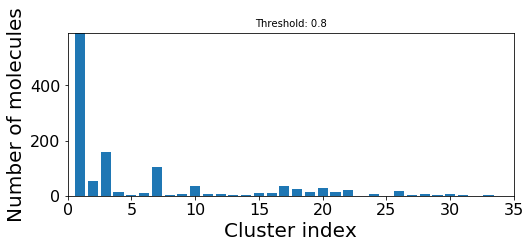

GA
Threshold:  0.9
total # clusters:  11
# clusters with only 1 compound:  1
# clusters with >5 compounds:  8
# clusters with >25 compounds:  4
# clusters with >100 compounds:  1


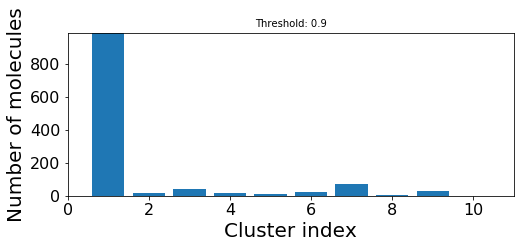

In [12]:
# cluster gate area
fps = df_GA.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'GA', cutoff=i)

B1
Threshold:  0.0
total # clusters:  56
# clusters with only 1 compound:  40
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


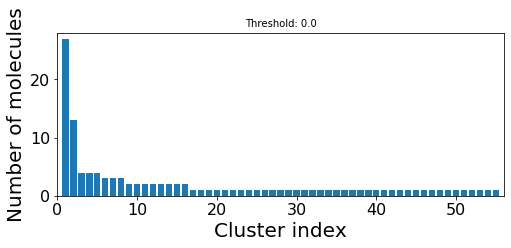

B1
Threshold:  0.1
total # clusters:  56
# clusters with only 1 compound:  40
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


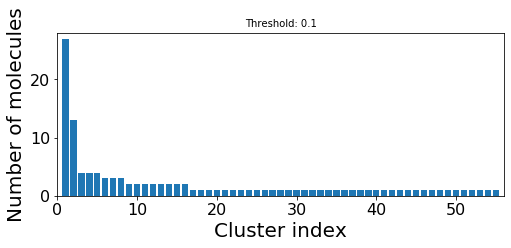

B1
Threshold:  0.2
total # clusters:  54
# clusters with only 1 compound:  37
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


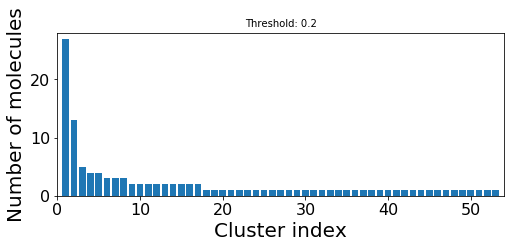

B1
Threshold:  0.30000000000000004
total # clusters:  49
# clusters with only 1 compound:  28
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


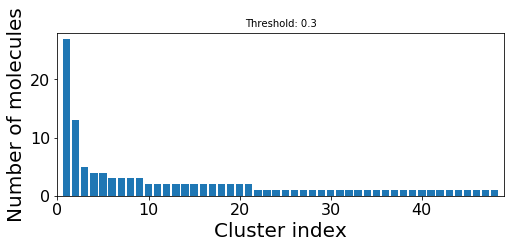

B1
Threshold:  0.4
total # clusters:  40
# clusters with only 1 compound:  23
# clusters with >5 compounds:  5
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


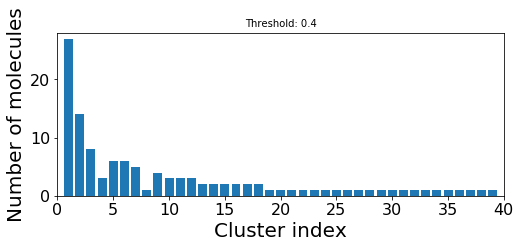

B1
Threshold:  0.5
total # clusters:  33
# clusters with only 1 compound:  17
# clusters with >5 compounds:  5
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


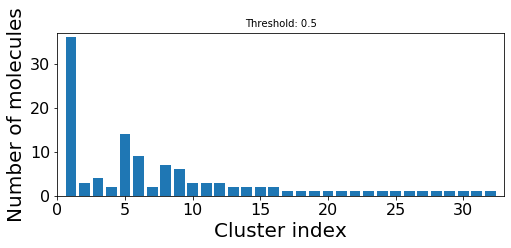

B1
Threshold:  0.6000000000000001
total # clusters:  31
# clusters with only 1 compound:  15
# clusters with >5 compounds:  4
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


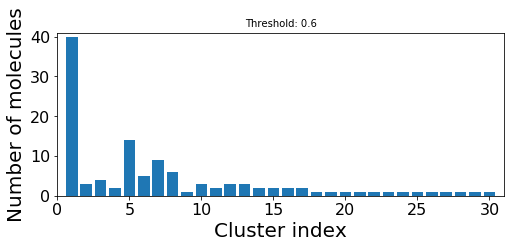

B1
Threshold:  0.7000000000000001
total # clusters:  23
# clusters with only 1 compound:  11
# clusters with >5 compounds:  4
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


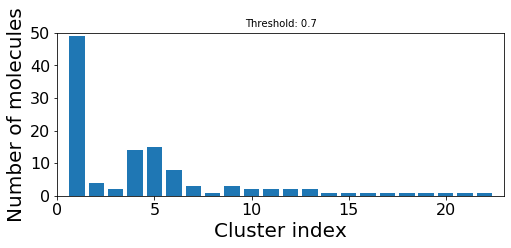

B1
Threshold:  0.8
total # clusters:  18
# clusters with only 1 compound:  6
# clusters with >5 compounds:  4
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


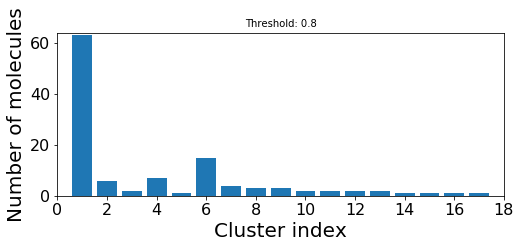

B1
Threshold:  0.9
total # clusters:  8
# clusters with only 1 compound:  3
# clusters with >5 compounds:  3
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


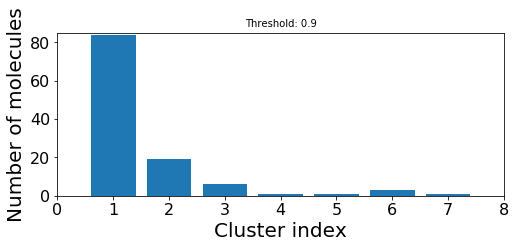

In [13]:
# cluster back pocket I
fps = df_B1.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'B1', cutoff=i)

B2
Threshold:  0.0
total # clusters:  124
# clusters with only 1 compound:  85
# clusters with >5 compounds:  7
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


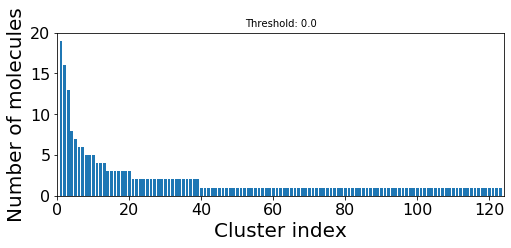

B2
Threshold:  0.1
total # clusters:  121
# clusters with only 1 compound:  81
# clusters with >5 compounds:  7
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


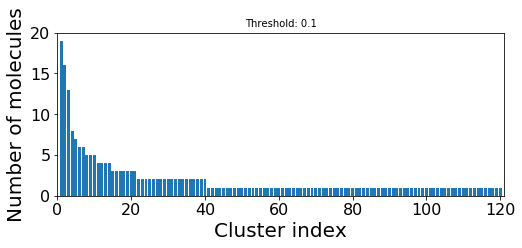

B2
Threshold:  0.2
total # clusters:  114
# clusters with only 1 compound:  71
# clusters with >5 compounds:  8
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


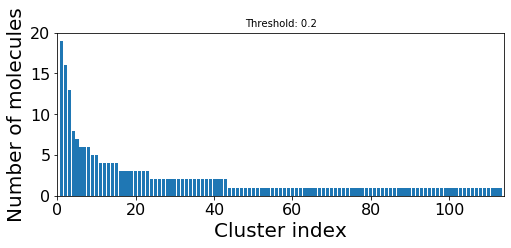

B2
Threshold:  0.30000000000000004
total # clusters:  103
# clusters with only 1 compound:  60
# clusters with >5 compounds:  10
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


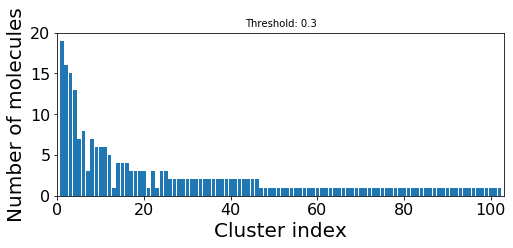

B2
Threshold:  0.4
total # clusters:  88
# clusters with only 1 compound:  43
# clusters with >5 compounds:  10
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


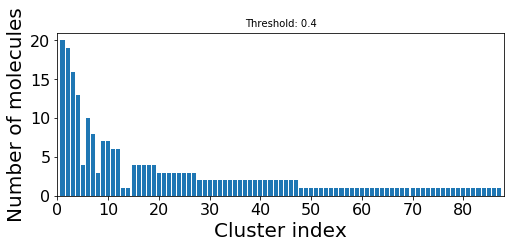

B2
Threshold:  0.5
total # clusters:  72
# clusters with only 1 compound:  30
# clusters with >5 compounds:  10
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


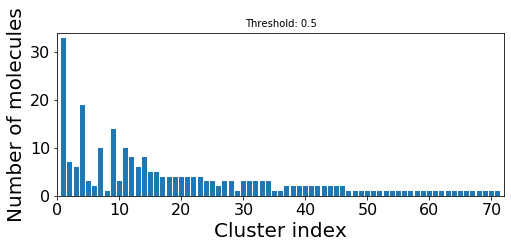

B2
Threshold:  0.6000000000000001
total # clusters:  58
# clusters with only 1 compound:  21
# clusters with >5 compounds:  12
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


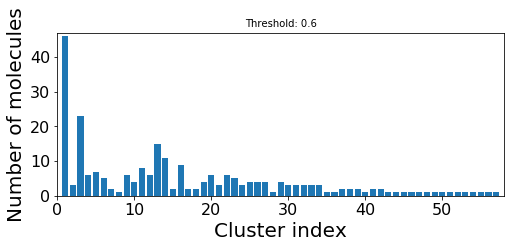

B2
Threshold:  0.7000000000000001
total # clusters:  33
# clusters with only 1 compound:  6
# clusters with >5 compounds:  10
# clusters with >25 compounds:  2
# clusters with >100 compounds:  0


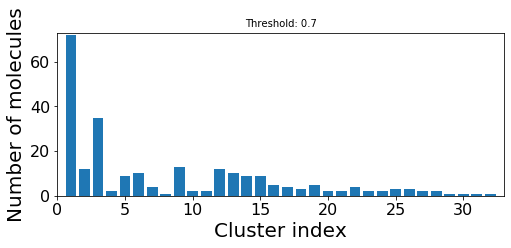

B2
Threshold:  0.8
total # clusters:  23
# clusters with only 1 compound:  7
# clusters with >5 compounds:  8
# clusters with >25 compounds:  2
# clusters with >100 compounds:  1


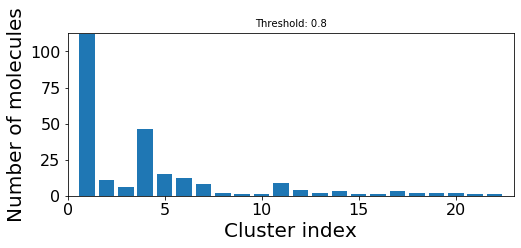

B2
Threshold:  0.9
total # clusters:  9
# clusters with only 1 compound:  2
# clusters with >5 compounds:  6
# clusters with >25 compounds:  1
# clusters with >100 compounds:  1


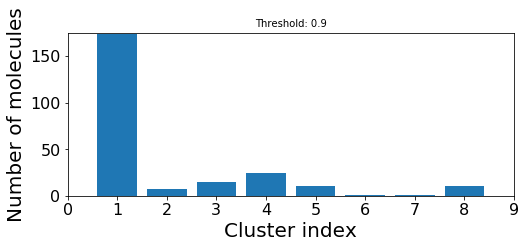

In [14]:
# cluster back pocket II
fps = df_B2.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'B2', cutoff=i)

## Investigate clusters:

In [15]:
def principal_components(X):
    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X = pca.transform(X)
    return [p[0] for p in X], [p[1] for p in X]

In [16]:
def find_cluster_mcs(cluster, frags, threshold=0.8):
    frags = list(frags)
    mols = [frags[i] for i in cluster]
    mcs = rdFMCS.FindMCS(mols, threshold=threshold)
    substructure = Chem.MolFromSmarts(mcs.smartsString)
    return substructure

In [17]:
def cluster_scatter_plots(x, y, clusters, n_clusters, df, subpocket):
    
    X, Y = [], []
    kinases = list(df.group)
    kinasesXY = []
    cluster_colors = []#np.empty(len(points), dtype=object)
    for p, point in enumerate(x):
        for c, cluster in enumerate(clusters[:n_clusters]):
            if p in cluster:
                cluster_colors.append(c)
                X.append(point)
                Y.append(y[p])
                kinasesXY.append(kinases[p])

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(X, Y, c=cluster_colors, s=20, cmap='brg')
    plt.title(str(n_clusters)+' largest clusters in '+subpocket+' colored by cluster')

    # find kinase colors
    kinase_set = list(set(kinasesXY))
    kinase_colors = []
    for k, kinase in enumerate(kinasesXY):
        kinase_colors.append(kinase_set.index(kinase))

    plt.subplot(1,2,2)
    plt.scatter(X, Y, c=kinase_colors, s=20, cmap='brg')
    plt.title(str(n_clusters)+' largest clusters in '+subpocket+' colored by kinase group')
    plt.show()
    
    return None

## ADENINE POCKET:

AP
Threshold:  0.5
total # clusters:  392
# clusters with only 1 compound:  182
# clusters with >5 compounds:  85
# clusters with >25 compounds:  18
# clusters with >100 compounds:  4


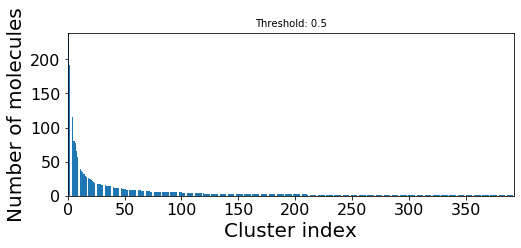

Total number of fragments:  2640


In [18]:
# investigate adenine pocket clusters
cutoff = 0.5
fps = df_AP.fingerprint
frags = df_AP.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)
 
analyze_clusters(clusters, 'AP', cutoff)

print('Total number of fragments: ', len(frags))

In [19]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

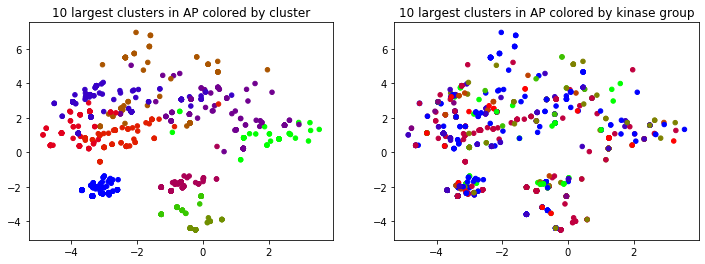

In [20]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_AP, 'AP')

Maximum common substructure per cluster: 


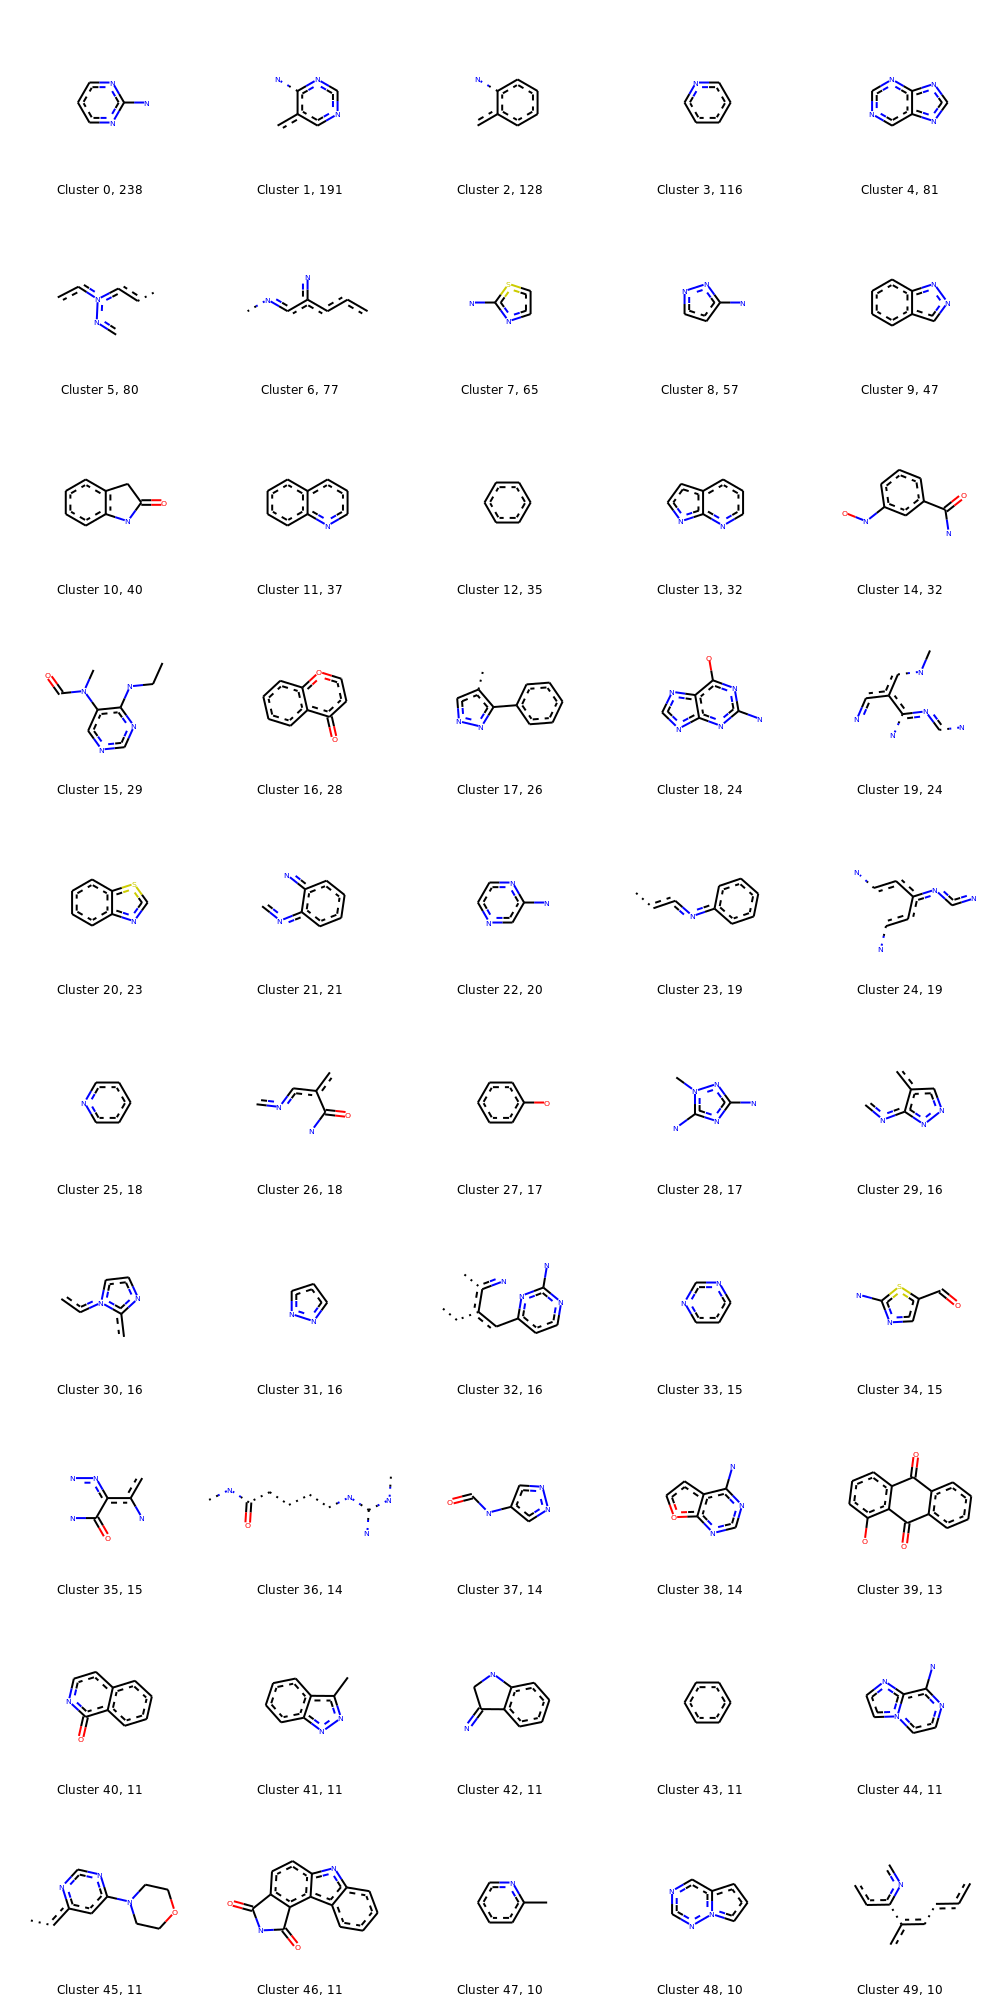

In [21]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:50]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
               
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

In [22]:
# kinases of first clusters for KinMap
kinases = list(df_AP.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/AP_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/AP_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster20_kinases = [kinases[i] for i in clusters[20]]
with open('./KinMap/AP_20.txt', 'w') as f:
    for k in cluster20_kinases:
        f.write(k)
        f.write('\n')
cluster39_kinases = [kinases[i] for i in clusters[39]]
with open('./KinMap/AP_39.txt', 'w') as f:
    for k in cluster39_kinases:
        f.write(k)
        f.write('\n')
cluster46_kinases = [kinases[i] for i in clusters[46]]
with open('./KinMap/AP_46.txt', 'w') as f:
    for k in cluster46_kinases:
        f.write(k)
        f.write('\n')

## FRONT POCKET:

FP
Threshold:  0.5
total # clusters:  305
# clusters with only 1 compound:  136
# clusters with >5 compounds:  62
# clusters with >25 compounds:  13
# clusters with >100 compounds:  2


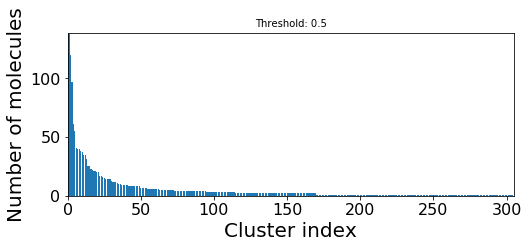

Total number of fragments:  1782


In [23]:
# investigate front pocket
cutoff = 0.5
fps = df_FP.fingerprint
frags = df_FP.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'FP', cutoff)

print('Total number of fragments: ', len(frags))

In [24]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

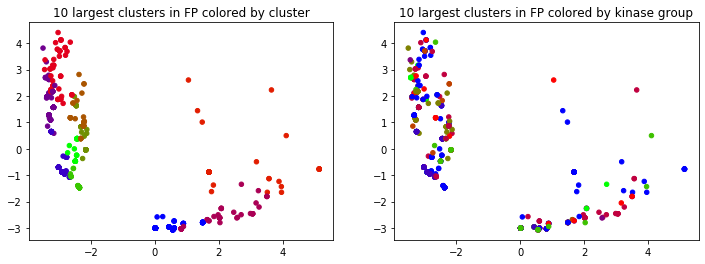

In [25]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_FP, 'FP')

Maximum common substructure per cluster: 


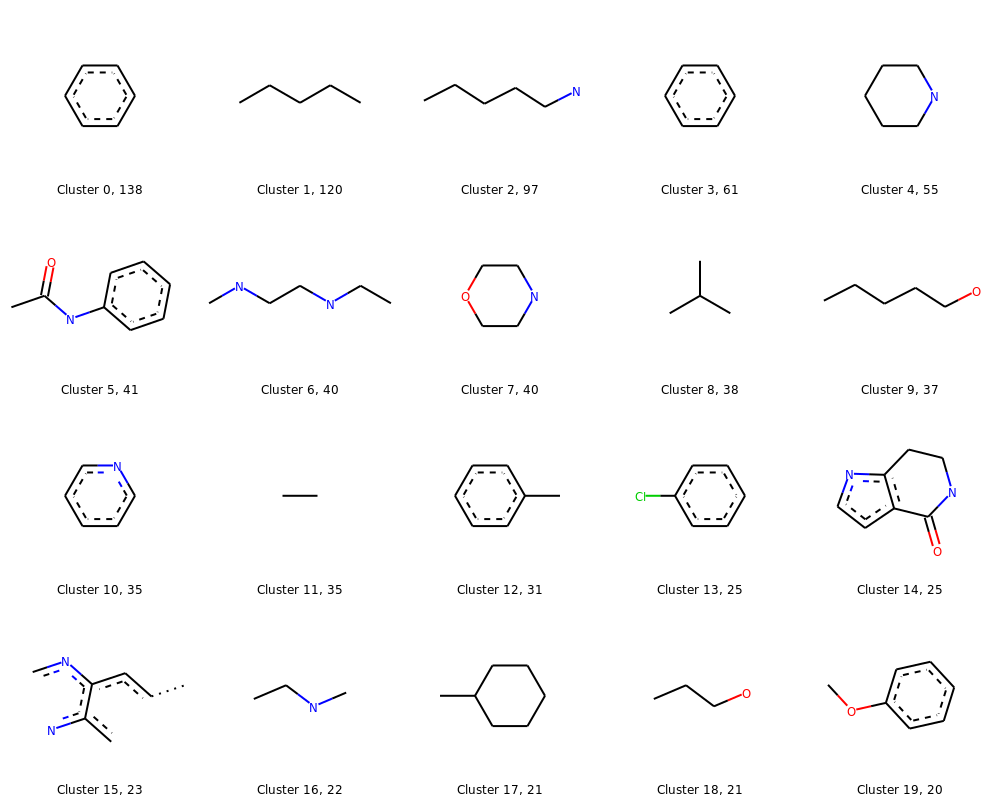

In [26]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

In [27]:
# kinases of first clusters for KinMap
kinases = list(df_FP.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/FP_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/FP_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster13_kinases = [kinases[i] for i in clusters[13]]
with open('./KinMap/FP_13.txt', 'w') as f:
    for k in cluster13_kinases:
        f.write(k)
        f.write('\n')

## SE POCKET:

SE
Threshold:  0.5
total # clusters:  213
# clusters with only 1 compound:  90
# clusters with >5 compounds:  43
# clusters with >25 compounds:  14
# clusters with >100 compounds:  2


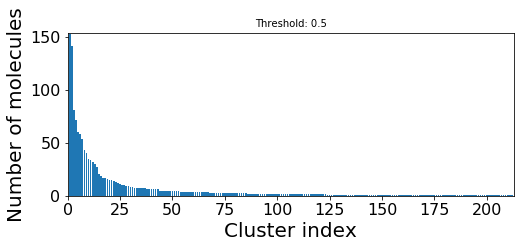

Total number of fragments:  1488


In [28]:
# investigate solvent exposed pocket
cutoff = 0.5
fps = df_SE.fingerprint
frags = df_SE.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'SE', cutoff)

print('Total number of fragments: ', len(frags))

In [29]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

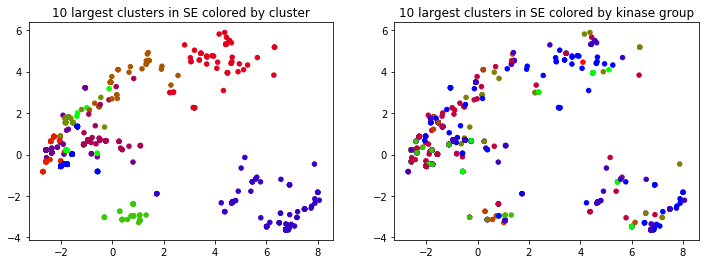

In [30]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_SE, 'SE')

Maximum common substructure per cluster: 


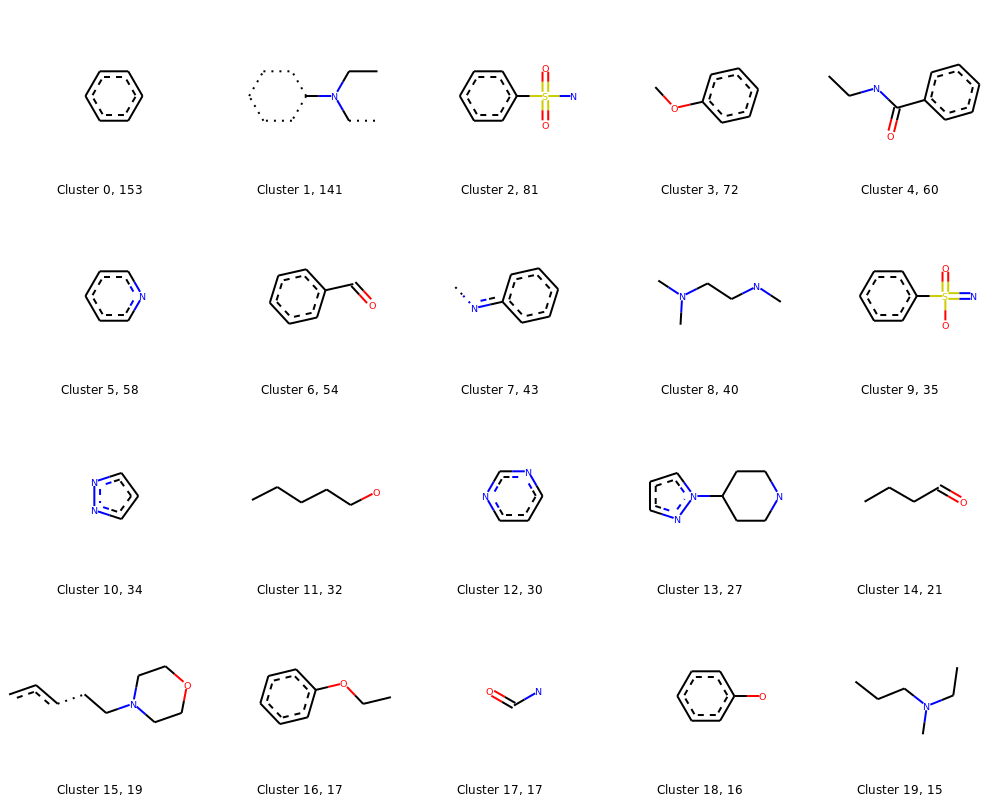

In [31]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

## GATE AREA:

GA
Threshold:  0.5
total # clusters:  180
# clusters with only 1 compound:  85
# clusters with >5 compounds:  36
# clusters with >25 compounds:  12
# clusters with >100 compounds:  1


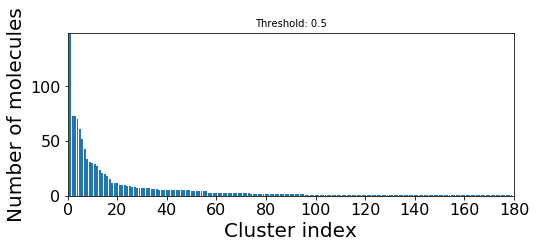

Total number of fragments:  1202


In [32]:
# investigate gate area
cutoff = 0.5
fps = df_GA.fingerprint
frags = df_GA.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'GA', cutoff)
print('Total number of fragments: ', len(frags))

In [33]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

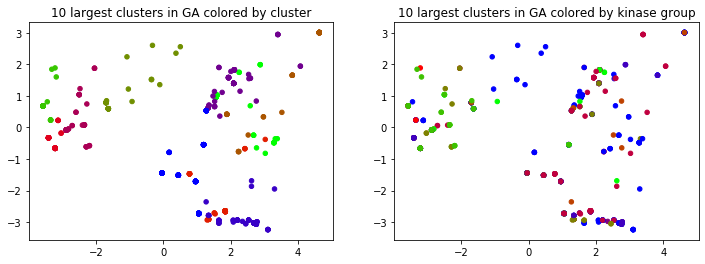

In [34]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_GA, 'GA')

Maximum common substructure per cluster: 


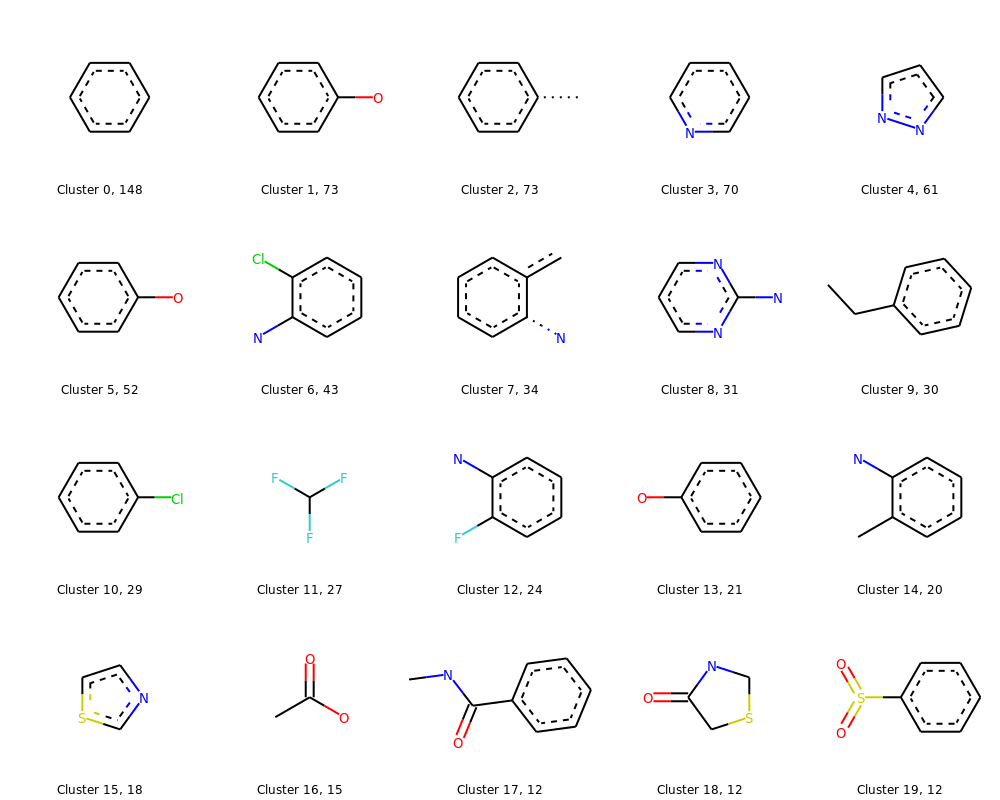

In [35]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

In [36]:
# kinases of first clusters for KinMap
kinases = list(df_GA.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/GA_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/GA_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster6_kinases = [kinases[i] for i in clusters[6]]
with open('./KinMap/GA_6.txt', 'w') as f:
    for k in cluster6_kinases:
        f.write(k)
        f.write('\n')
cluster11_kinases = [kinases[i] for i in clusters[11]]
with open('./KinMap/GA_11.txt', 'w') as f:
    for k in cluster11_kinases:
        f.write(k)
        f.write('\n')
cluster19_kinases = [kinases[i] for i in clusters[19]]
with open('./KinMap/GA_19.txt', 'w') as f:
    for k in cluster19_kinases:
        f.write(k)
        f.write('\n')

## BACK POCKET I

B1
Threshold:  0.5
total # clusters:  33
# clusters with only 1 compound:  17
# clusters with >5 compounds:  5
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


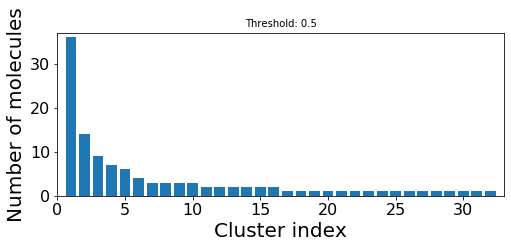

Total number of fragments:  246


In [37]:
# investigate back pocket I
cutoff = 0.5
fps = df_B1.fingerprint
frags = df_B2.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'B1', cutoff)
print('Total number of fragments: ', len(frags))

In [38]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

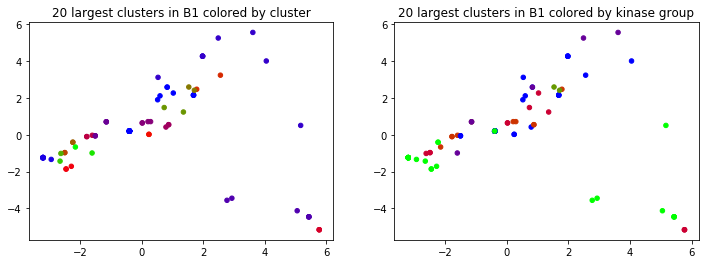

In [39]:
# plot clusters
n_clusters = 20
cluster_scatter_plots(x, y, clusters, n_clusters, df_B1, 'B1')

Maximum common substructure per cluster: 


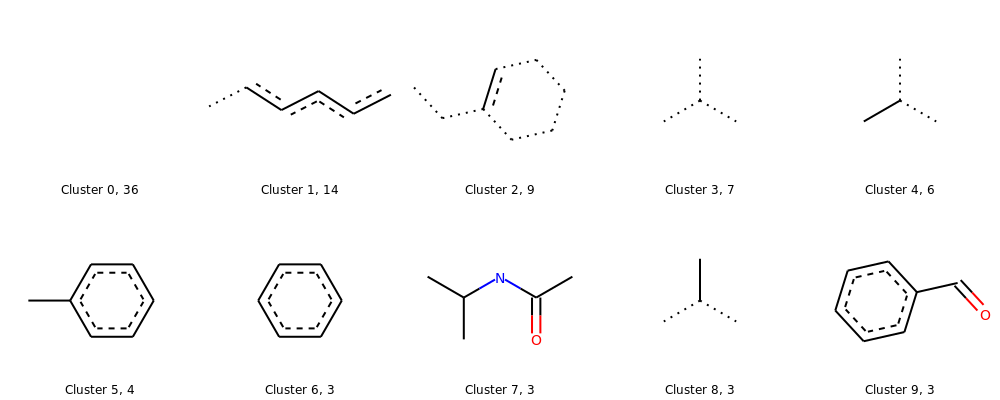

In [40]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:10]):
    mcs = find_cluster_mcs(cluster, frags, threshold=0.7) # different threshold than usual in order to see sth!
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

## BACK POCKET II

B2
Threshold:  0.5
total # clusters:  72
# clusters with only 1 compound:  30
# clusters with >5 compounds:  10
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


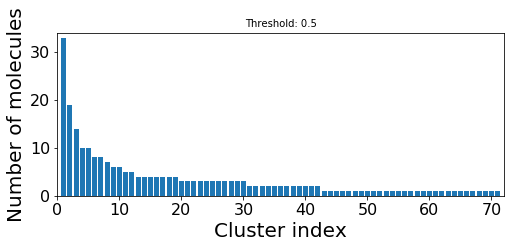

Total number of fragments:  246


In [41]:
# investigate back pocket II
cutoff = 0.5
fps = df_B2.fingerprint
frags = df_B2.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'B2', cutoff)
print('Total number of fragments: ', len(frags))

In [42]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

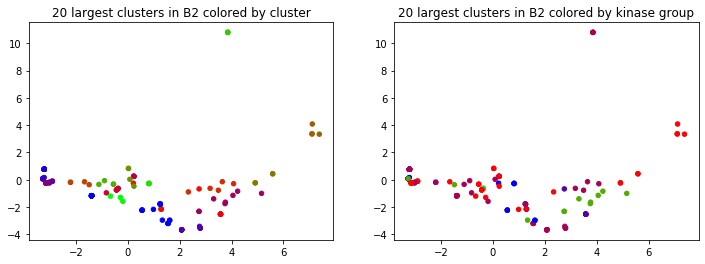

In [43]:
# plot clusters
n_clusters = 20
cluster_scatter_plots(x, y, clusters, n_clusters, df_B2, 'B2')

Maximum common substructure per cluster: 


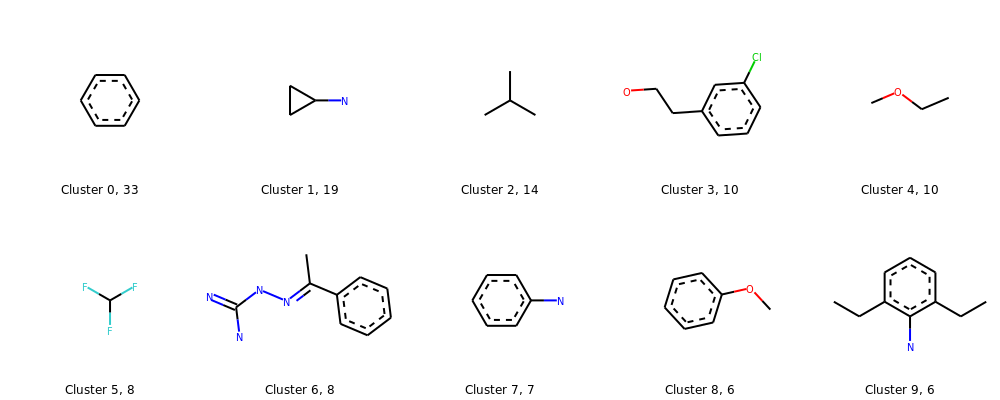

In [44]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:10]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

In [45]:
# kinases of first clusters for KinMap
kinases = list(df_B2.kinase)
cluster0_kinases = [kinases[i] for i in clusters[0]]
with open('./KinMap/B2_0.txt', 'w') as f:
    for k in cluster0_kinases:
        f.write(k)
        f.write('\n')
cluster1_kinases = [kinases[i] for i in clusters[1]]
with open('./KinMap/B2_1.txt', 'w') as f:
    for k in cluster1_kinases:
        f.write(k)
        f.write('\n')
cluster3_kinases = [kinases[i] for i in clusters[3]]
with open('./KinMap/B2_3.txt', 'w') as f:
    for k in cluster3_kinases:
        f.write(k)
        f.write('\n')